# Lets Play Cricket  - IPL Exploration Analysis

Anybody who is a cricket Fan should surely try to analyse this dataset as it would help you in learning with a fun factor. I have tried my best to keep this notebook as simple as possible so that even a beginner can understand it easily. At the same time I have made efforts to analyse the dataset in different aspects effectively. I will keep updating the notebook as and when I come up with new things. Hope you like it!!!

The notebook contains:
 - Basic Analysis like Teams with maximum matches, wins,etc
 - Batsman Analysis
 - Bowler Analysis
 - 200+ scores analysis

If you like the notebook, **Please Upvote** as it will keep me motivated in doing great things ahead. Thanks!!

I have used the following packages for visualisations:

 1. Matplotlib
 2. Seaborn
 3. Plotly

Not all the visuals are interactive as Plotly is not useful everywhere. I have mentioned **INTERACTIVE** at places where the visuals are inteactive.

Following is a **Tableau Dashboard**. DO have a look at it.

## Tableau Dashboard

In [1]:
%%HTML

<div class='tableauPlaceholder' id='viz1512062244547' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IPLDashboard_0&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1512062244547');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1520px';vizElement.style.height='1787px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 840.2 kB/s eta 0:00:17
   - -------------------------------------- 0.5/14.8 MB 840.2 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/14.8 MB 745.8 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/14.8 MB 745.8 kB/s eta 0:00:19
   -- ------------------------------------- 1.0/14.8 MB 671.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.8 MB 671.0 kB/s eta 0:00:21
   --- ------------------------------------ 1.3/14.8 MB 677.8 kB/s eta 0:00:20
   --- ------------------------------------ 1.3/14.8 MB 677.8 kB/s eta 0:00:20
   ---- --


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
matches=pd.read_csv('matches.csv')   
delivery=pd.read_csv('deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [4]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Some Cleaning And Transformation

In [5]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [6]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [7]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

## Some Basic Analysis

In [8]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [9]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [10]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [12]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [14]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
# df
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [15]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujrat Lions(GL) with the highest wins by wickets

## Toss Decisions

In [16]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 toss_decision
field    62.911612
bat      47.313692
Name: count, dtype: float64


### Toss Decisions across Seasons

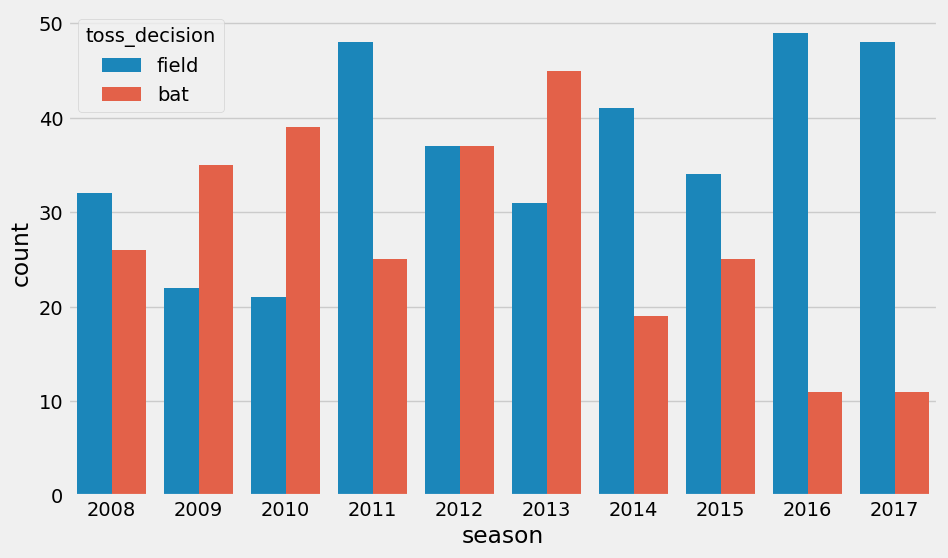

In [17]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting. 

### Maximum Toss Winners

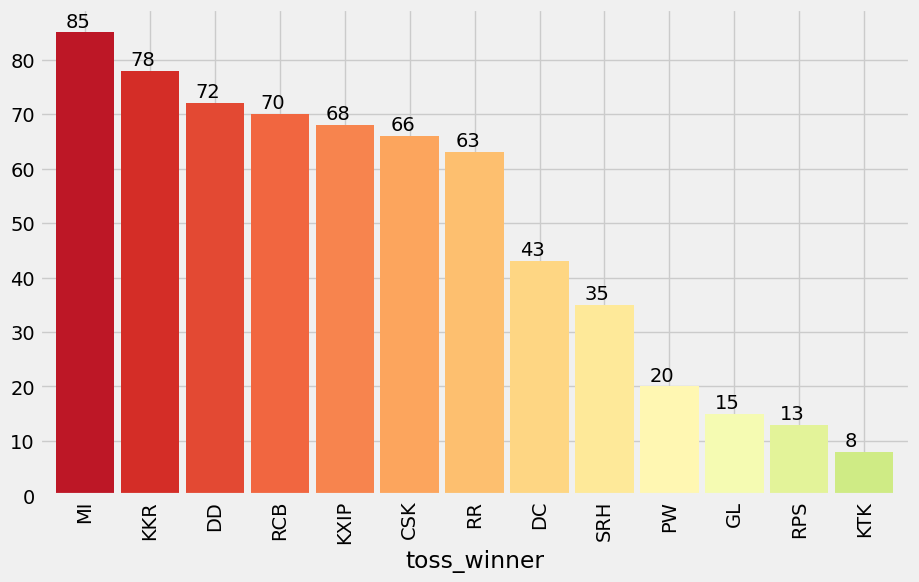

In [22]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
# print(ax)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

### Total Matches vs Wins for Teams (INTERACTIVE)

In [23]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [62]:
# pkj = matches['winner'].value_counts().reset_index()
# pkj.columns = ['win', 'total_win']
# pkj.set_index('win', inplace=True)
# print(matches_played_byteams.head())
# print(pkj.head())


# pkj = pd.concat([pkj, matches_played_byteams], axis=1)
# print(pkj)

tdf = matches['winner'].value_counts().reset_index()
tdf.set_index('winner', inplace=True)
# tdf
print(tdf['count'])


winner
MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
RR      63
DD      62
SRH     42
DC      29
RPS     15
GL      13
PW      12
KTK      6
Name: count, dtype: int64


In [74]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
# print(matches_played_byteams.head(3))

matches_played_byteams=matches_played_byteams.value_counts().reset_index()
# print(matches_played_byteams.head(3))

matches_played_byteams.columns=['Team','Total Matches']
# print(matches_played_byteams.head(3))
tdf = matches['winner'].value_counts().reset_index()
tdf.columns = ['Team', 'wins']
# tdf.set_index('winner', inplace=True)
print(tdf.head(5))
print(matches_played_byteams.head(5))
# matches_played_byteams.set_index('Team', inplace=True)
# matches_played_byteams = pd.concat([matches_played_byteams, tdf], axis=1)
# matches_played_byteams['wins'] = tdf['wins']
# matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()
matches_played_byteams = matches_played_byteams.merge(tdf, on='Team', how='left')
matches_played_byteams.set_index('Team',inplace=True)

print(matches_played_byteams.head(10))

# matches_played_byteams.set_index('Team',inplace=True)
# print(matches_played_byteams.head(5))

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

   Team  wins
0    MI    92
1   CSK    79
2   KKR    77
3   RCB    73
4  KXIP    70
   Team  Total Matches
0    MI            157
1   RCB            152
2   KKR            148
3  KXIP            148
4    DD            147
      Total Matches  wins
Team                     
MI              157    92
RCB             152    73
KKR             148    77
KXIP            148    70
DD              147    62
CSK             131    79
RR              118    63
SRH              76    42
DC               75    29
PW               46    12


### Is Toss Winner Also the Match Winner?

  toss_winner winner
1         RPS    RPS
2         KKR    KKR
3        KXIP   KXIP
4         RCB    RCB
5         SRH    SRH


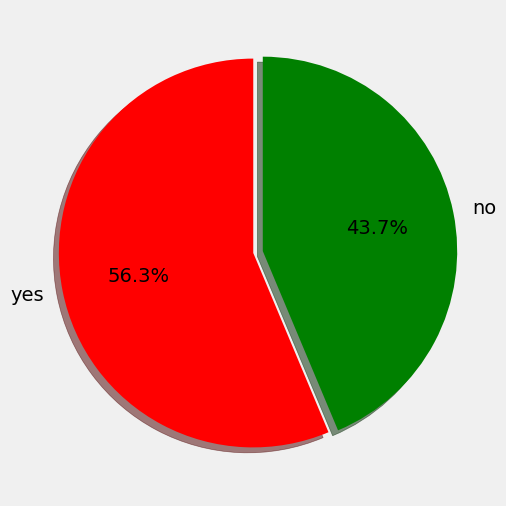

In [79]:
df=matches[matches['toss_winner']==matches['winner']]
print(matches[matches['toss_winner']==matches['winner']][['toss_winner', 'winner']].head(5))
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winnong team is about 50%-50%

##  Matches played across each season

C:\Users\hp.1\AppData\Local\Temp\ipykernel_10628\4278690967.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp.1\AppData\Local\Temp\ipykernel_10628\4278690967.py:2: UserWarning:


The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.



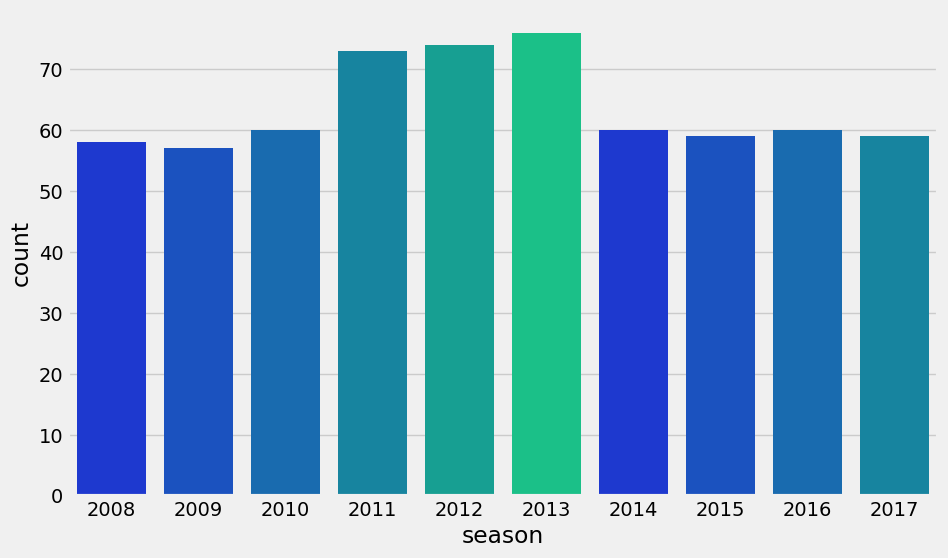

In [80]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

### Runs Across the Seasons

   season  match_id  inning batting_team bowling_team  over  ball    batsman  \
0    2017         1       1          SRH          RCB     1     1  DA Warner   
1    2017         1       1          SRH          RCB     1     2  DA Warner   
2    2017         1       1          SRH          RCB     1     3  DA Warner   
3    2017         1       1          SRH          RCB     1     4  DA Warner   
4    2017         1       1          SRH          RCB     1     5  DA Warner   

  non_striker    bowler  ...  bye_runs  legbye_runs  noball_runs  \
0    S Dhawan  TS Mills  ...         0            0            0   
1    S Dhawan  TS Mills  ...         0            0            0   
2    S Dhawan  TS Mills  ...         0            0            0   
3    S Dhawan  TS Mills  ...         0            0            0   
4    S Dhawan  TS Mills  ...         0            0            0   

   penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0             0             0      

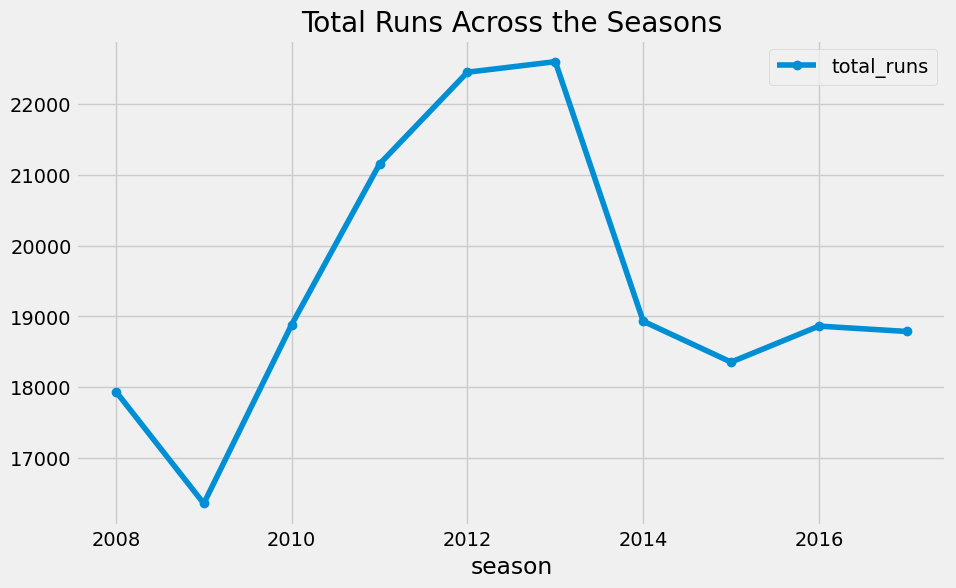

In [82]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
print(batsmen.head(5))
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

### Average runs per match in each Season

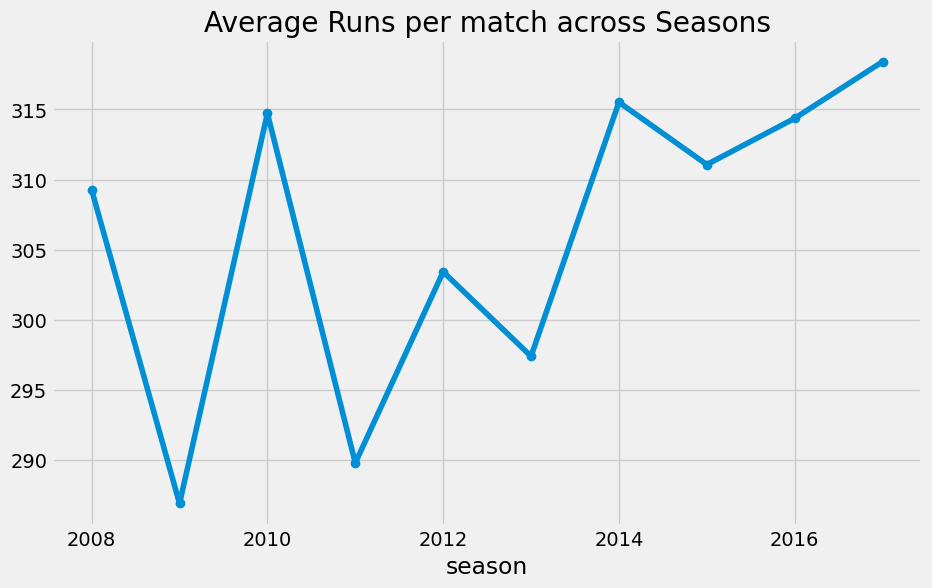

In [83]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

### Sixes and Fours Across the Season

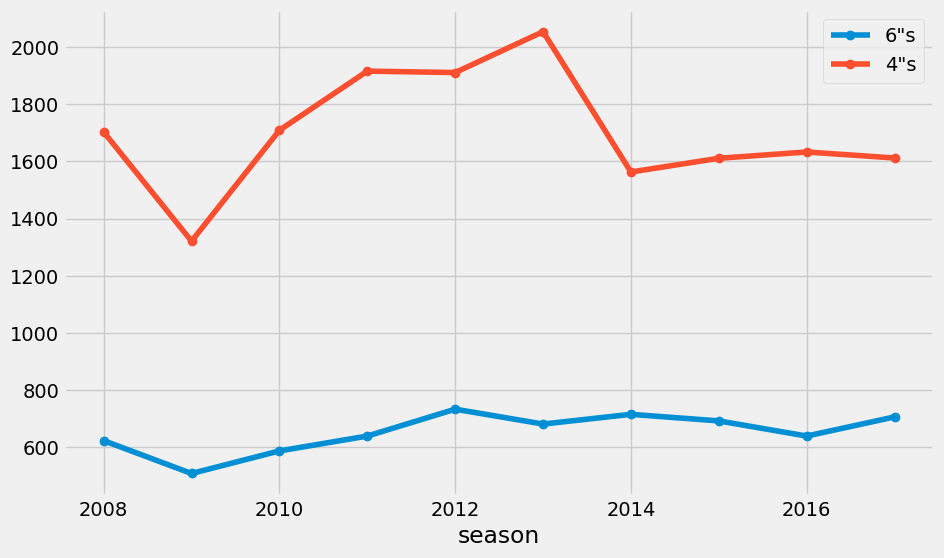

In [84]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

In [88]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc='sum')
runs_per_over

batting_team,CSK,DC,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,
1,684,482,931,209,999,103,909,873,264,918,163,713,485
2,944,614,1124,226,1093,96,1057,1038,301,1007,200,740,553
3,1020,566,1140,294,1153,115,1144,1153,357,1210,250,848,602
4,1086,571,1192,269,1198,126,1228,1251,329,1184,246,936,591
5,1140,586,1209,267,1180,97,1229,1265,316,1171,262,874,631
6,1147,598,1069,294,1132,143,1287,1366,328,1138,302,954,639
7,909,472,1049,259,985,89,990,1013,246,935,198,776,492
8,970,539,1010,249,965,86,1130,1063,317,1117,201,826,493
9,980,519,1095,242,1010,88,1093,1111,296,1192,203,873,545


### Runs Per Over By Teams Across Seasons

C:\Users\hp.1\AppData\Local\Temp\ipykernel_10628\1696738432.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



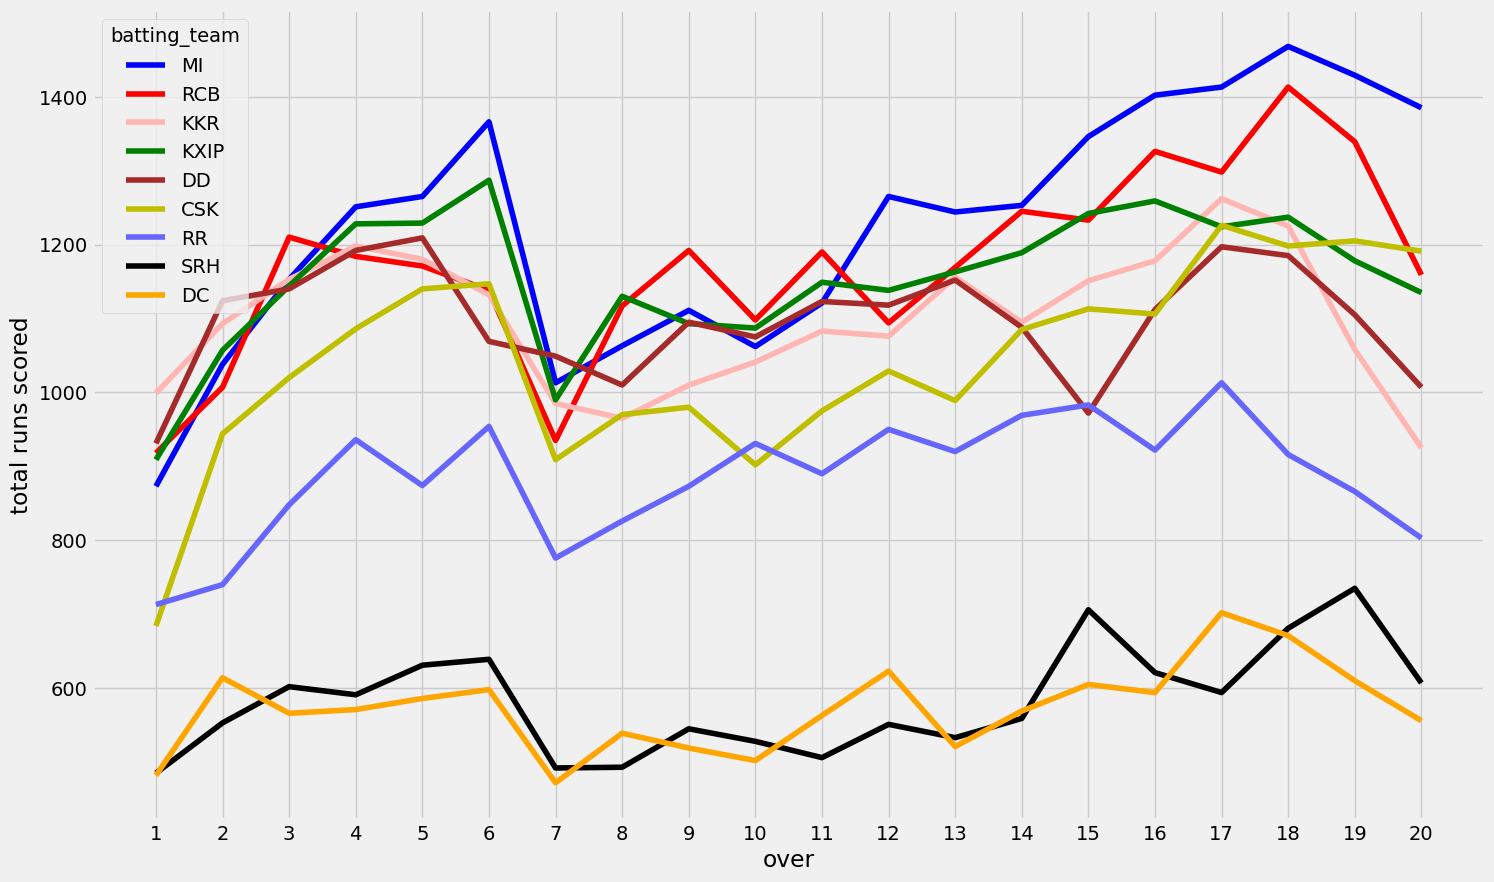

In [85]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

Maximum runs are being scored in the last 5 overs of the match. MI and RCB have shown a incresing trend in the runs scored throughout the match. 

### Favorite Grounds

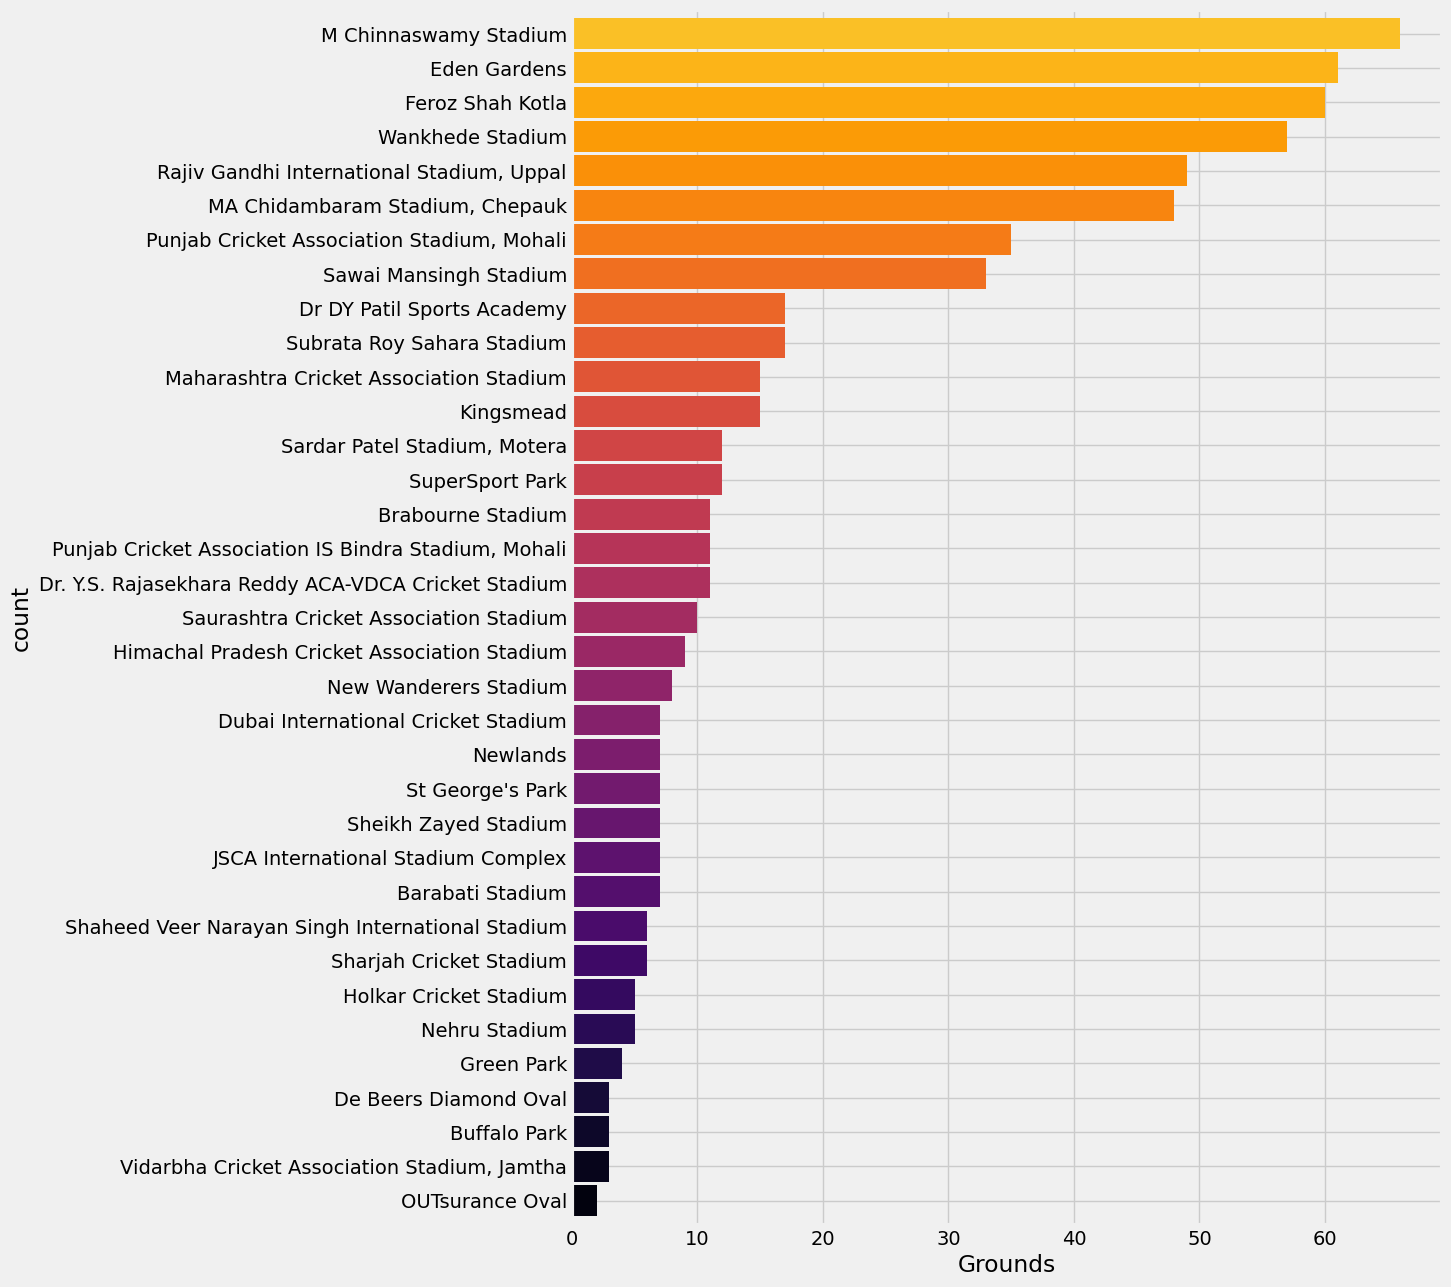

In [89]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

## Maximum Man Of Matches

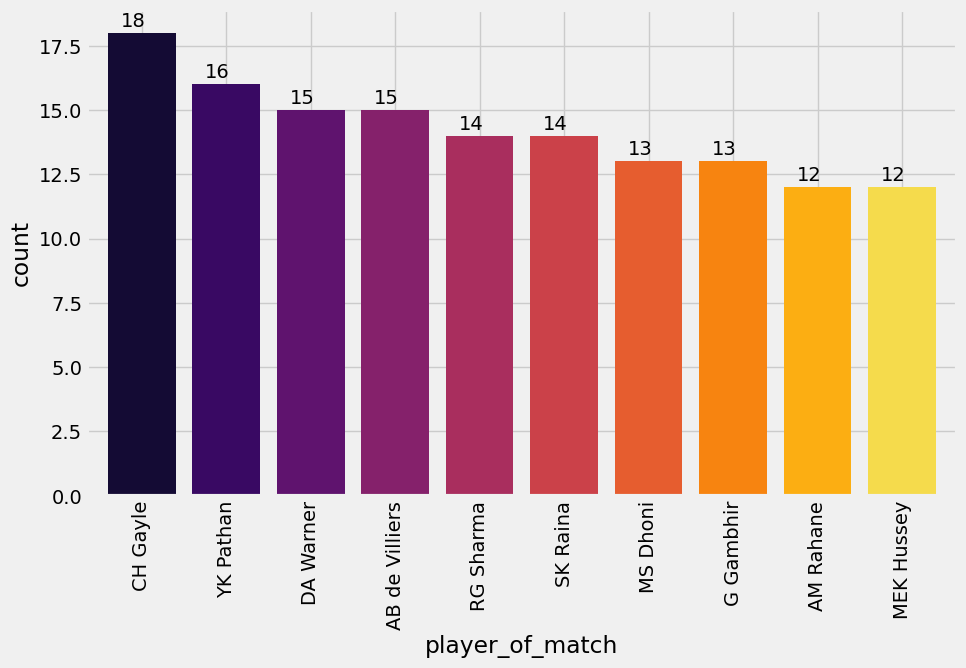

In [90]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

## Winners by Year

In [91]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


C:\Users\hp.1\AppData\Local\Temp\ipykernel_10628\960918047.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Super Over!

In [92]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [93]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['KTK', 'RPS', 'DC', 'PW']


### Favorite Umpires

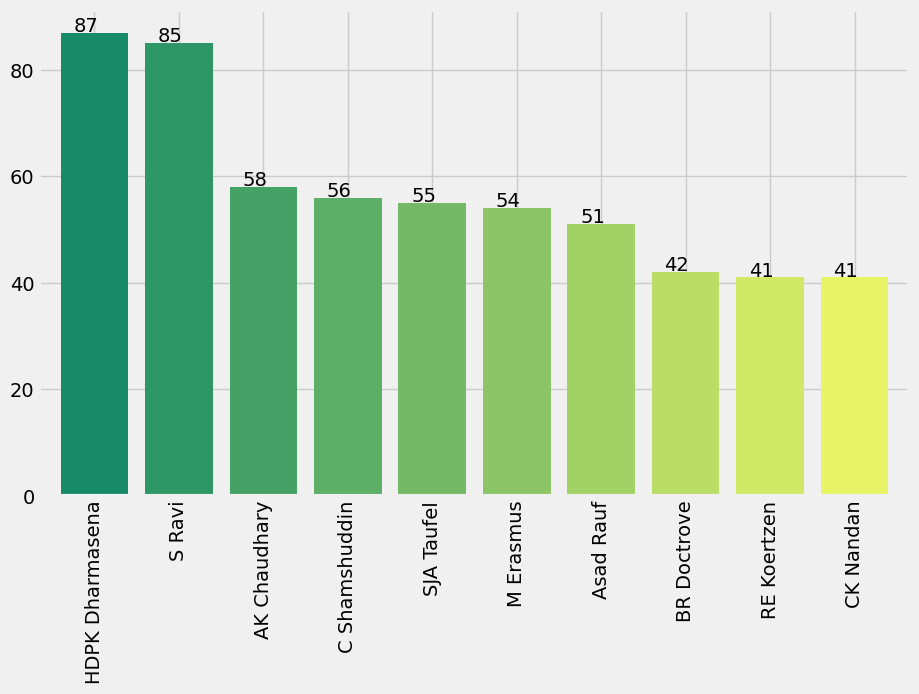

In [94]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

## Team1 vs Team2

Here we will check the matches played between 2 teams and which had won more matches each year

### MI vs KKR

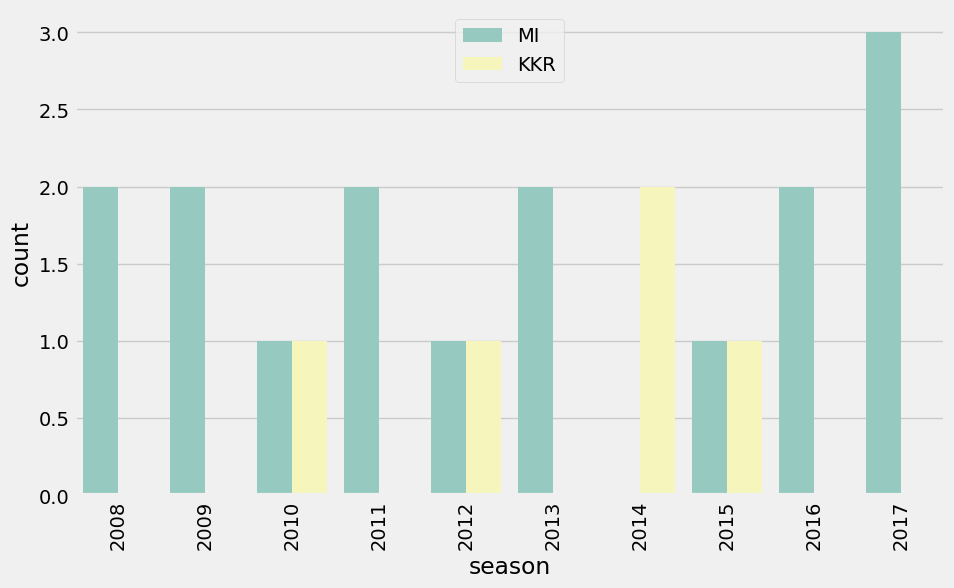

In [95]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')


MI have defeated KKR in 13 out of 18 matches played between them.Only in the year 2014, KKR won both the matches.Thus in a MI vs KKR match, we know on whom should we bet upon. Similar comparisions can be done between any two teams, we just need to change the team names. 

One thing to notice is that MI and KKR have never played against each other in any qualifiers or finals as both of them have played only 2 matches every year, those being the group stage matches.

### MI vs CSK

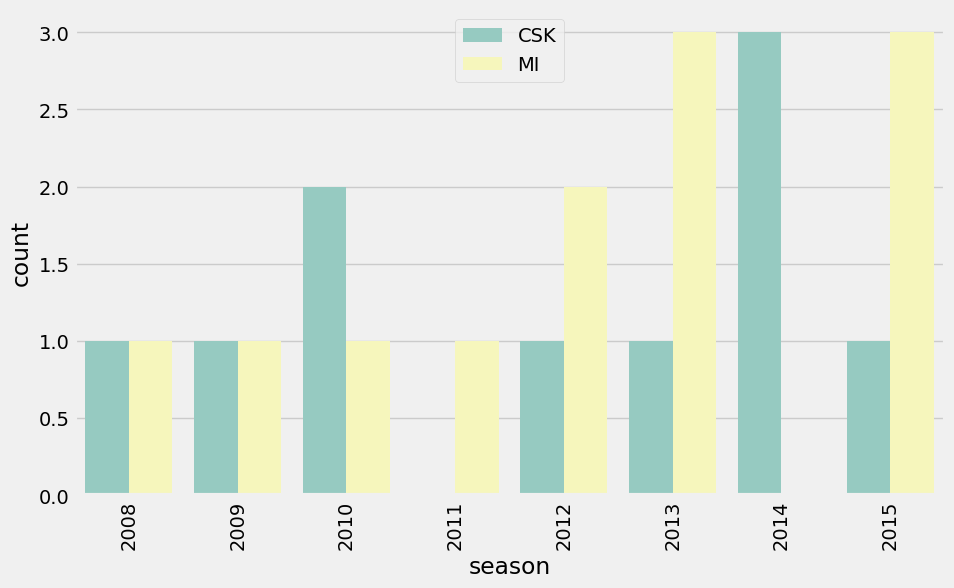

In [104]:
team1_vs_team2('CSK','MI')

Here se can see that MI and CSK have played against each other in more than 2 matches in some seasons i.e they have played qualifiers too.

## Matches Won By A Team Against Other Teams

Now we will be checking the number of times a Team has won against other teams. This will give us an idea as which team has an upper hand over the others when they play head-to-head.

In [96]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

winner  MI  KKR
count   16    5
winner  MI  RCB
count   13    8
winner  MI  DC
count    6   4
winner  MI  CSK
count   12   10
winner  MI  RR
count   10   6
winner  MI  DD
count   11   9
winner  MI  GL
count    2   2
winner  MI  KXIP
count   10    10
winner  MI  SRH
count    5    5
winner  RPS  MI
count     4   2
winner  KTK
count     1
winner  MI  PW
count    5   1


### Score Distribution For Teams by Innings

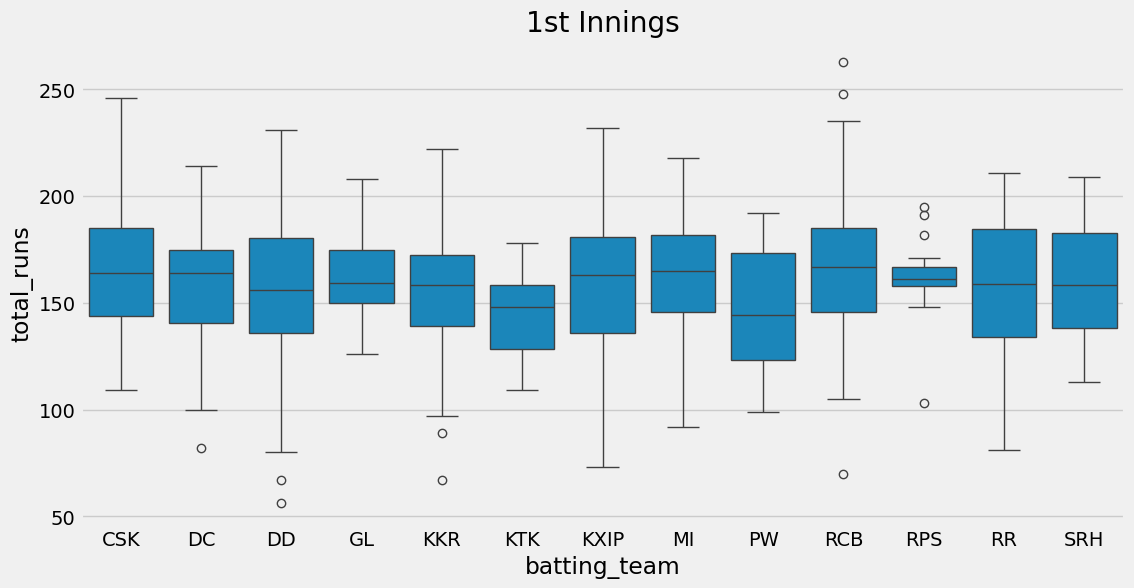

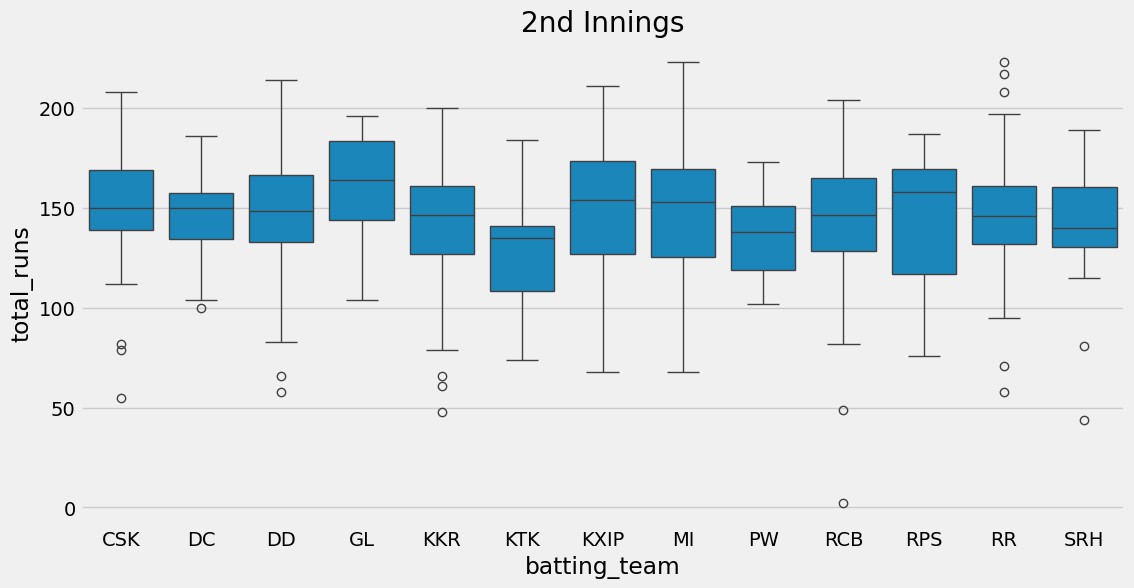

In [97]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

According to Graph 1 the batting by CSK in innings 1 looks to be the best.  Graph 2 also conveys the same story.

In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted. 

## 200+ Scores

In [98]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


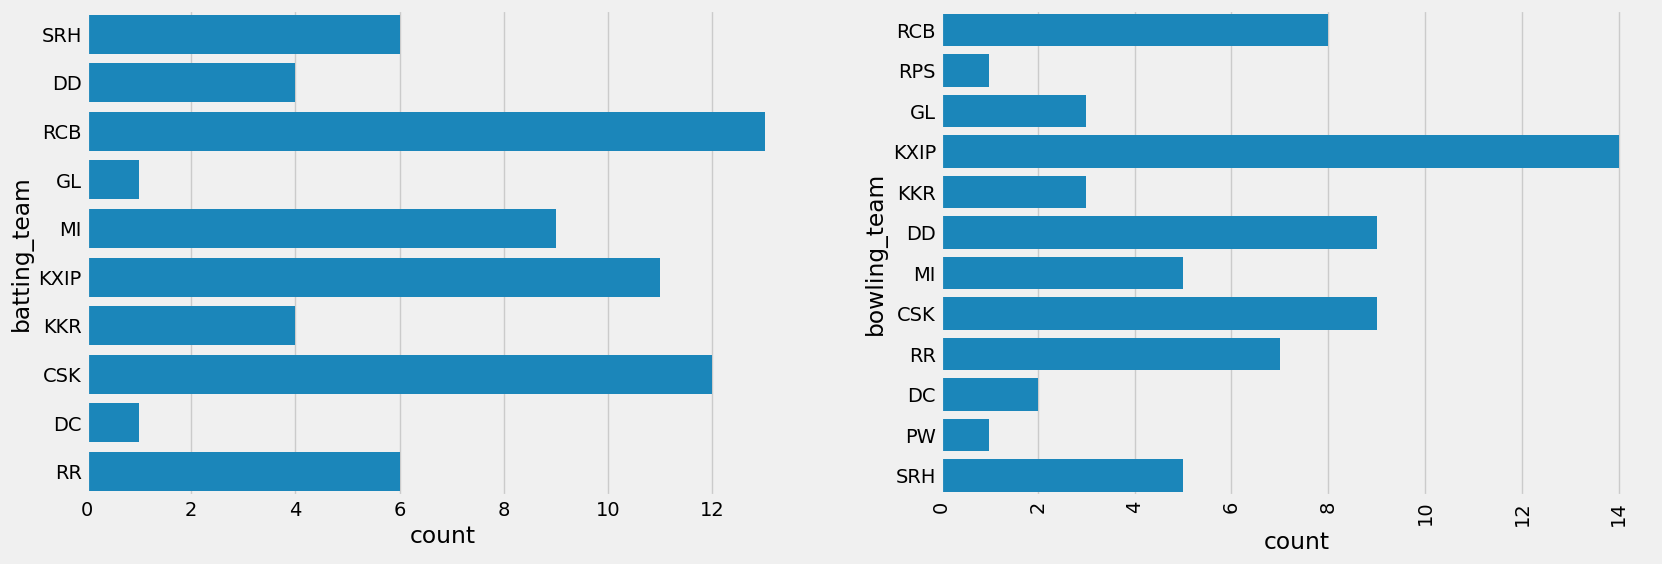

In [99]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs. 

In [100]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['KTK', 'RPS', 'PW']
Teams who haven"t conceeded over 200 while bowling ['KTK']


In [101]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

The above dataframe shows the number of times a team has scored above 200 runs against another team. Clearly MI has scored 200+ againt DD 3 times and similarly RCB has scored 200+ againt KXIP 3 times. Also the number of 200+ runs are higher in the 1st innings.

In [102]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


### Chances of chasing 200+ target

ValueError: could not convert string to float: 'no'

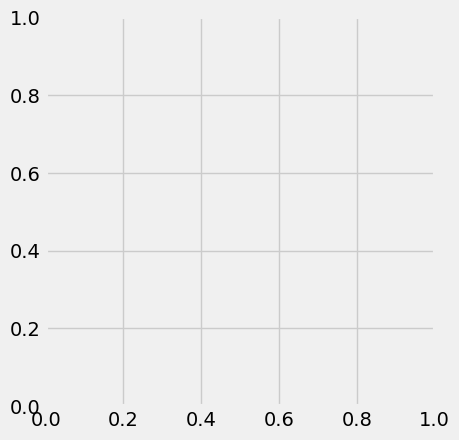

In [ ]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],shadow=True,startangle=90,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

It seems to be clear that team batting first and scoring 200+ runs, has a very high probablity of winning the match.

## Batsman Comparator

I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.

In [107]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()


,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.

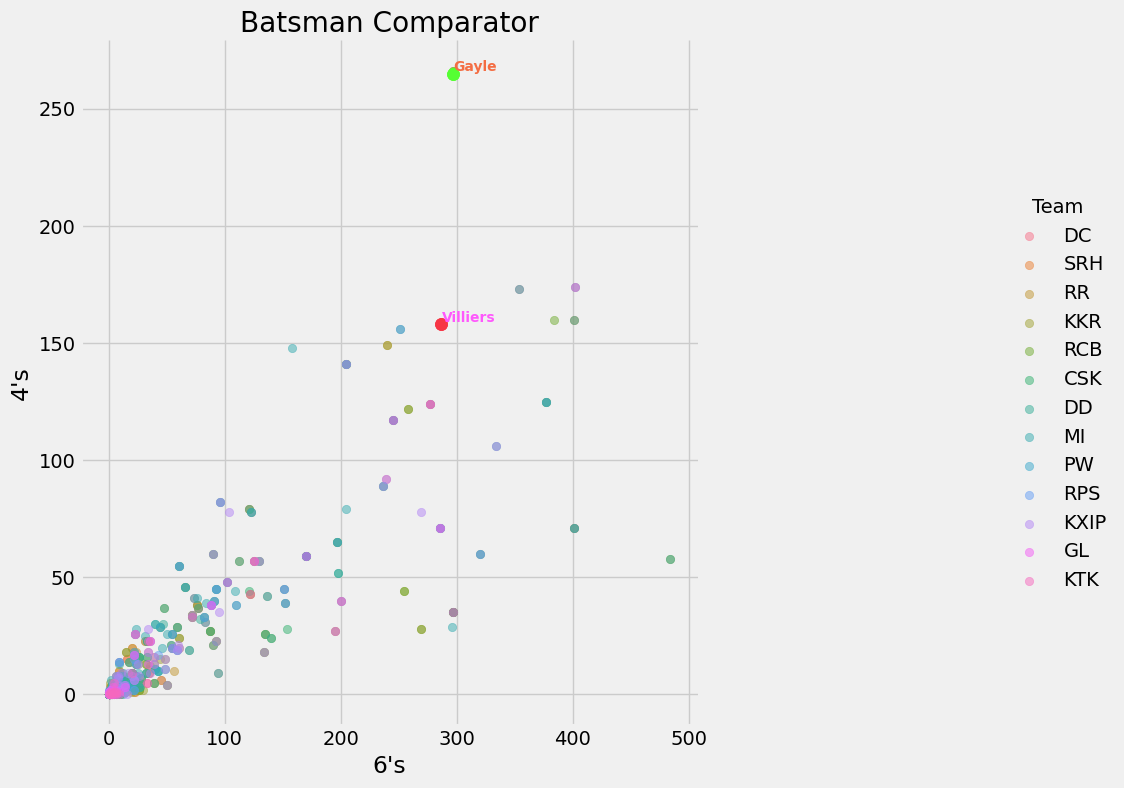

In [110]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team').map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)

    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator')
    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

### Dhoni Vs Kohli

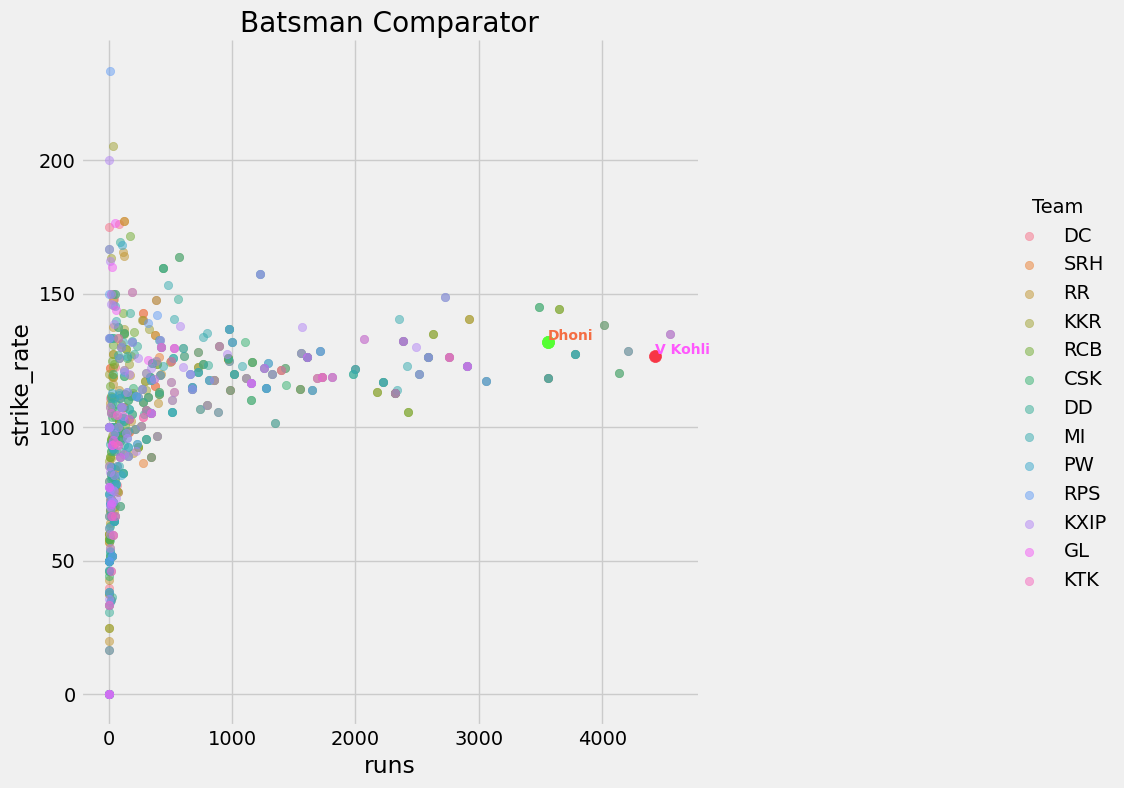

In [111]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

## Top Batsmen

### Top 10 Batsman 

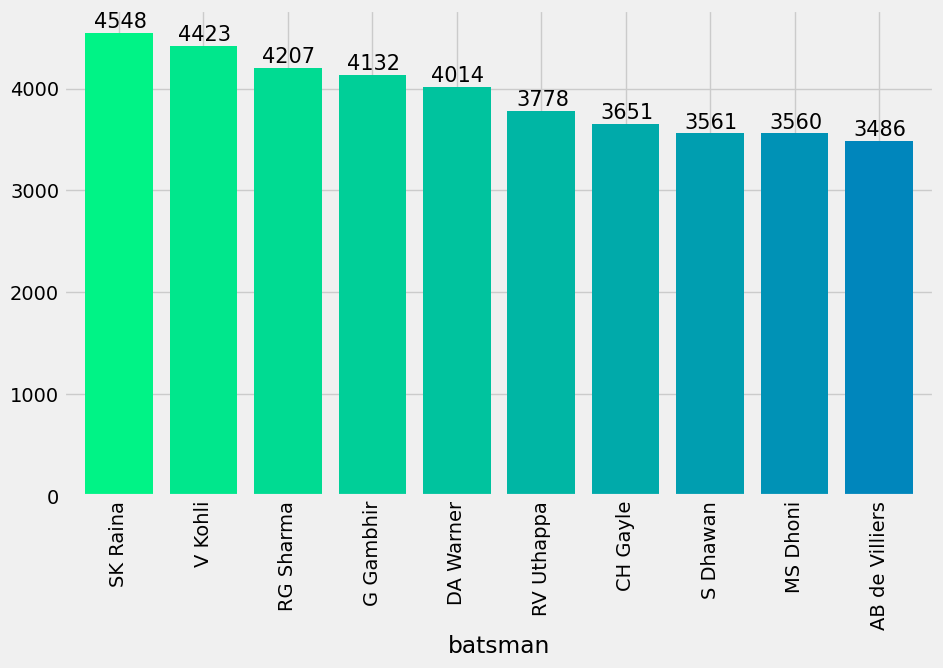

In [112]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot

### Top Batsman's with 1's, 2's, 3's, 4's 

KeyError: 1

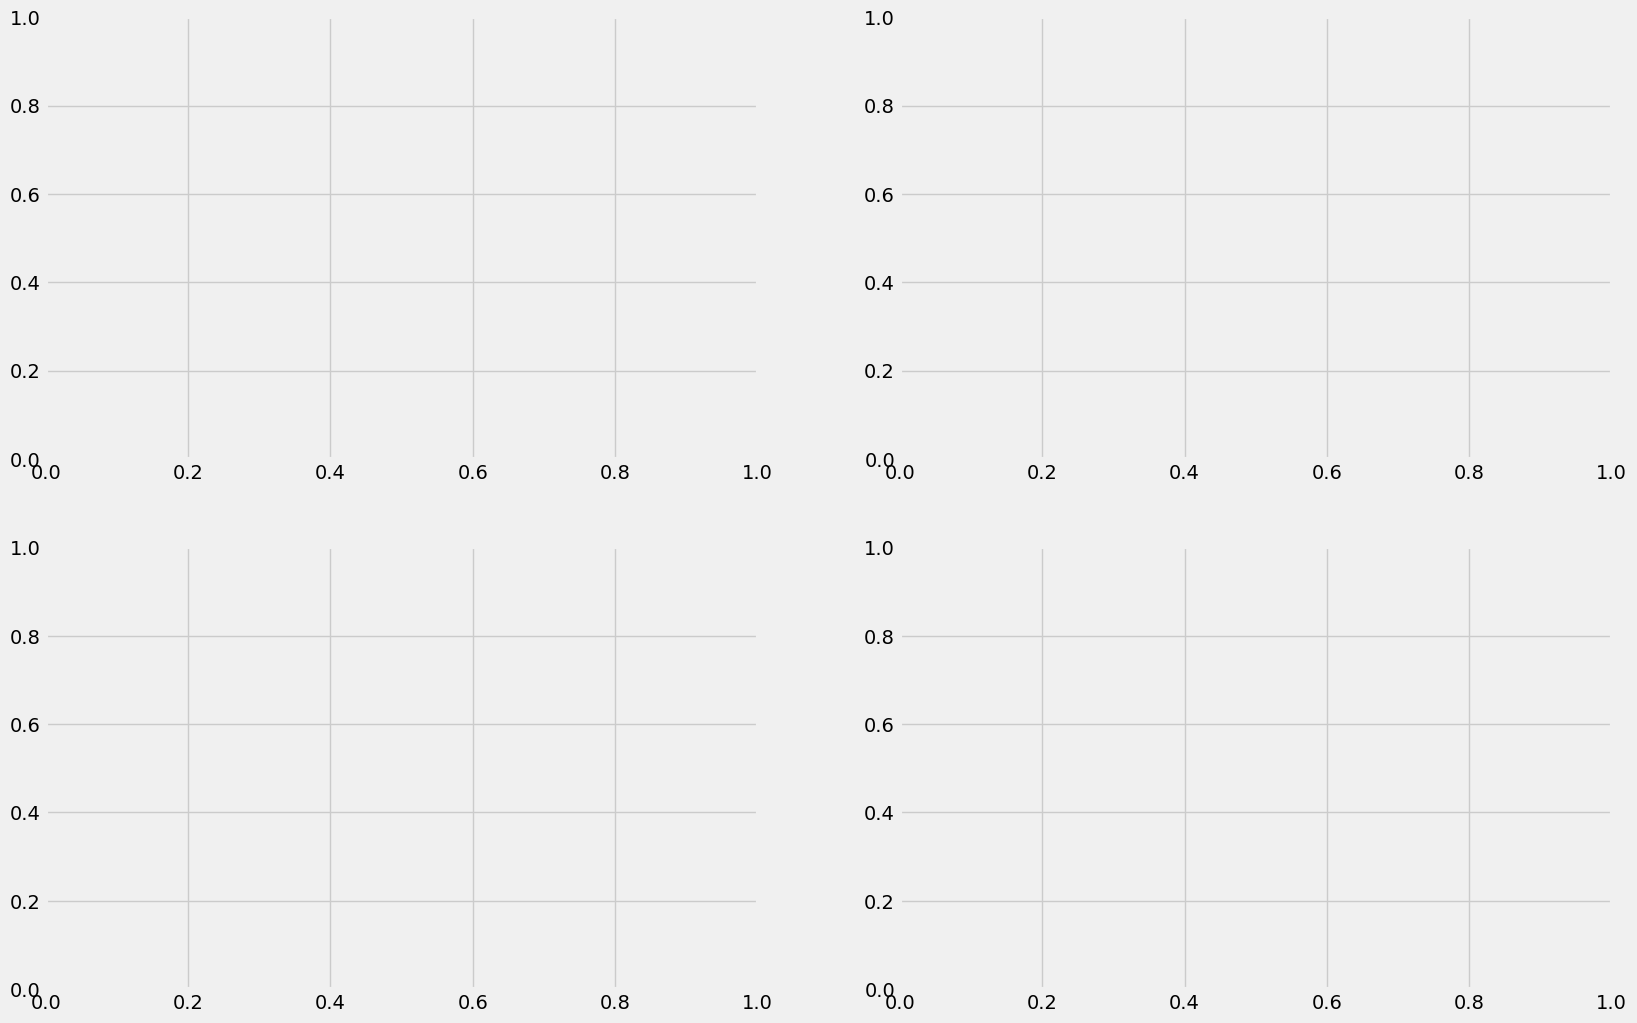

In [119]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()

toppers=toppers.pivot(columns='batsman',index='batsman_runs',values='total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

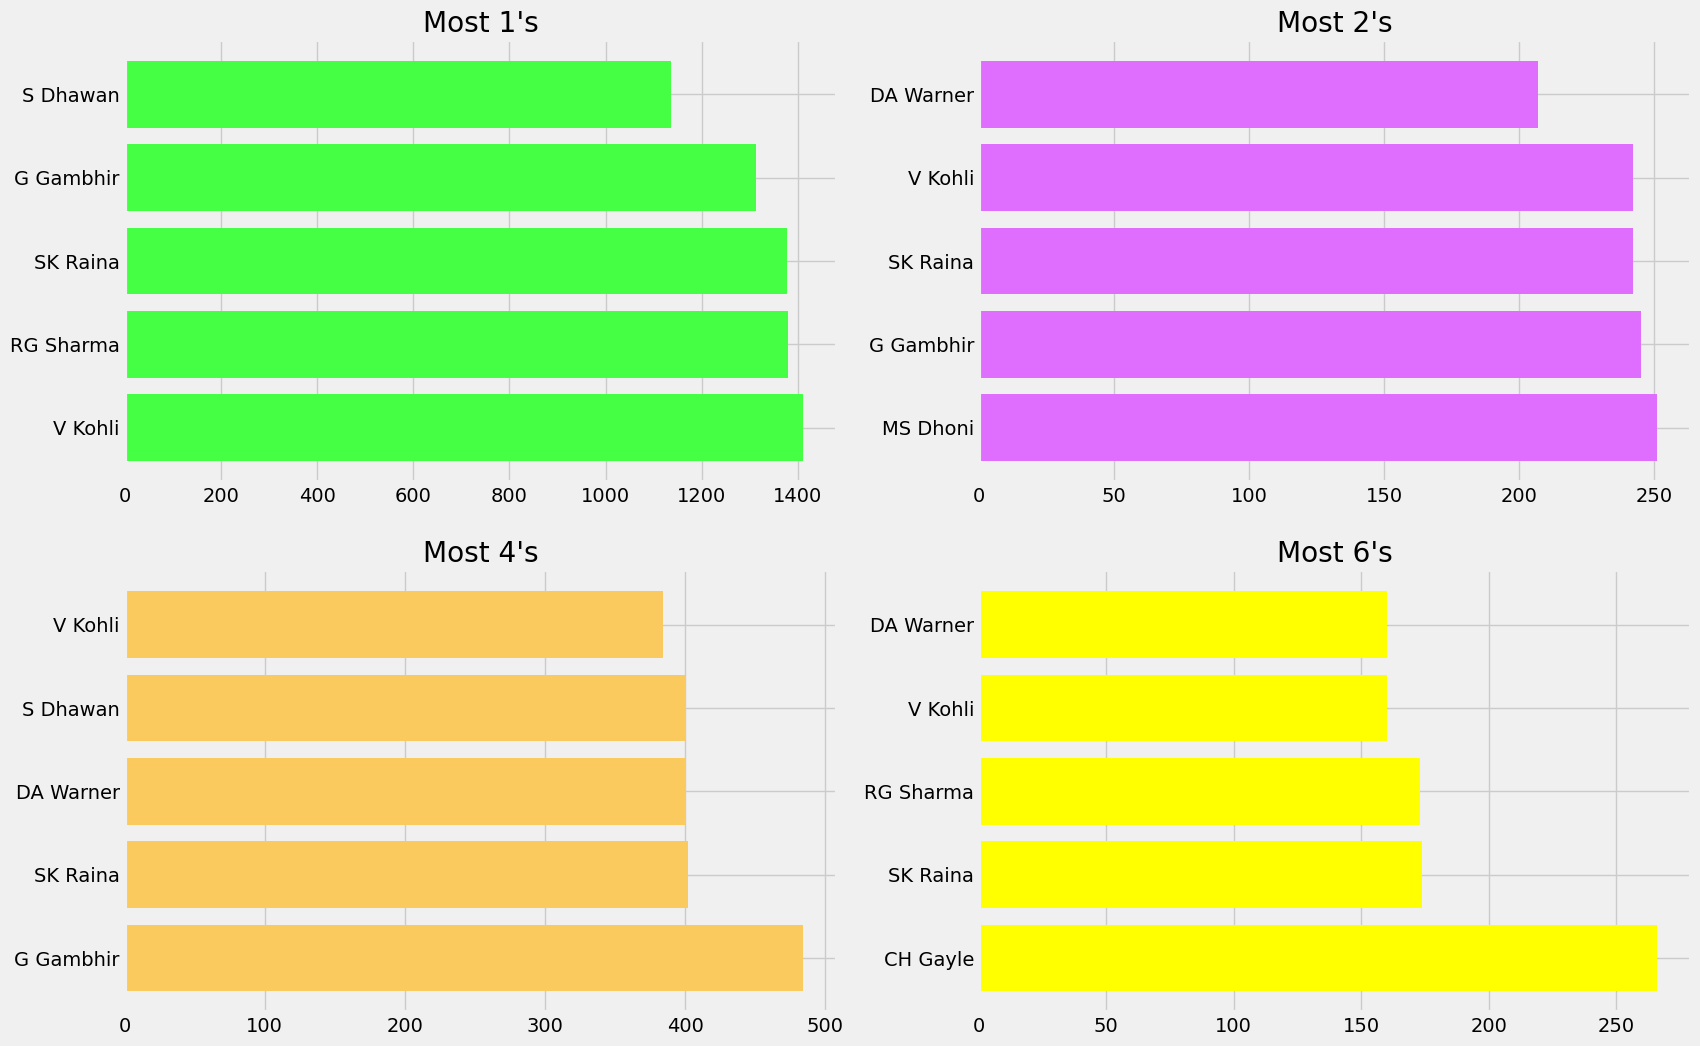

In [120]:
# Grouping by batsman and batsman_runs
toppers = delivery.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()

# Ensure 'batsman_runs' is treated as an integer
toppers['batsman_runs'] = toppers['batsman_runs'].astype(int)

# Pivot the DataFrame to make 'batsman' columns and 'batsman_runs' index
toppers = toppers.pivot(index='batsman_runs', columns='batsman', values='total_runs')

# Create subplots
fig, ax = mlt.subplots(2, 2, figsize=(18, 12))

# Safely plot only if 'batsman_runs' exists in index
for run_value, subplot, color, title in zip([1, 2, 4, 6], 
                                             [(0, 0), (0, 1), (1, 0), (1, 1)], 
                                             ['#45ff45', '#df6dfd', '#fbca5f', '#ffff00'], 
                                             ["Most 1's", "Most 2's", "Most 4's", "Most 6's"]):

    if run_value in toppers.index:
        toppers.loc[run_value].sort_values(ascending=False)[:5].plot(
            kind='barh', ax=ax[subplot], color=color, width=0.8
        )
        ax[subplot].set_title(title)
        ax[subplot].set_ylabel('')

# Show the plots
mlt.show()


**Observations:**

 1. Kohli has scored the maximum 1's
 2. Dhoni has the maximum 2's . Those Strong Legs :p
 3. Gambhir has the maximum 4's.
 4. C Gayle has the maximum 6's  and he leads by a big margin.

### Top Individual Scores

In [121]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


Here too the Jamaican leads the table. Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

### Individual Scores By Top Batsman each Inning

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning:

7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning:

24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning:

20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning:

20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning:

24.1% of the points cannot be placed; you may want to dec

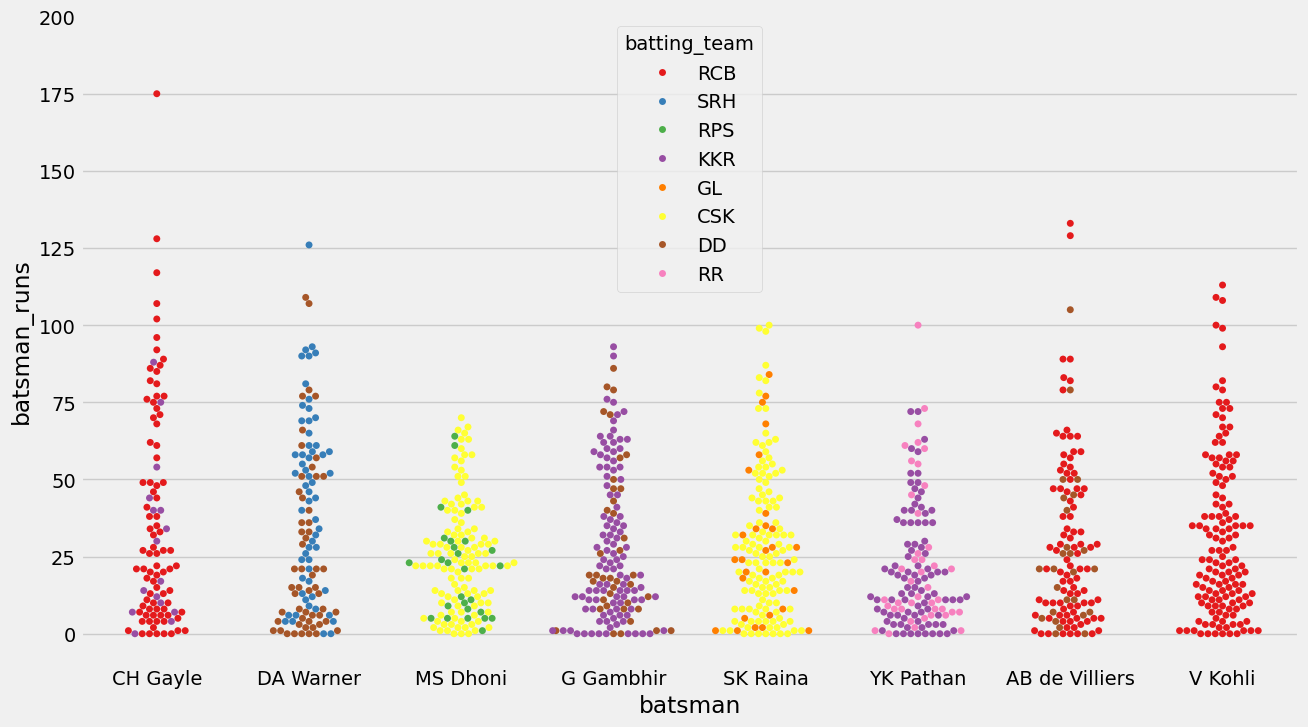

In [122]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

**Observations:**

 1. **Chris Gayle** has the highest Individual Score of **175** and Highest Number of Centuries i.e **5**
 2. **MS Dhoni** and **Gautam Gambhir** have never scored a Century.
 3. **V Kohli** has played only for 1 IPL Team in all seasons i.e RCB

### Runs Scored By Batsman Across Seasons

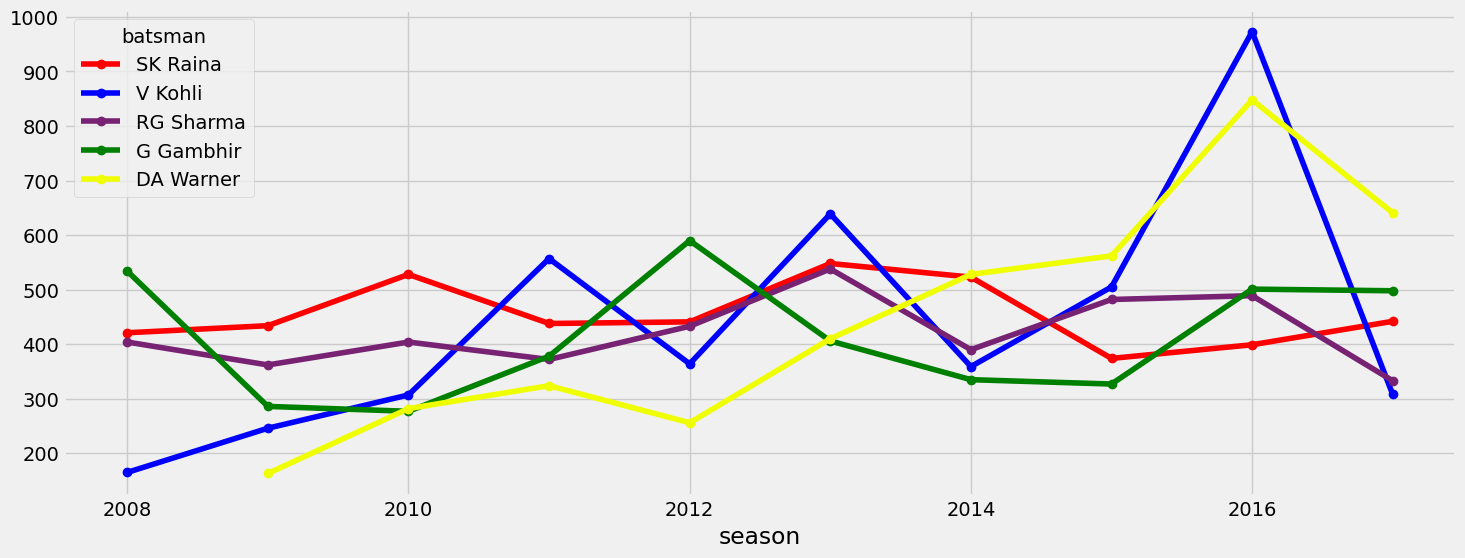

In [123]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the last season.

### How do the top batsmen score? (INTERACTIVE)

In [125]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot(index='batsman',columns='type',values='count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
        line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

### Frequency of Scores 

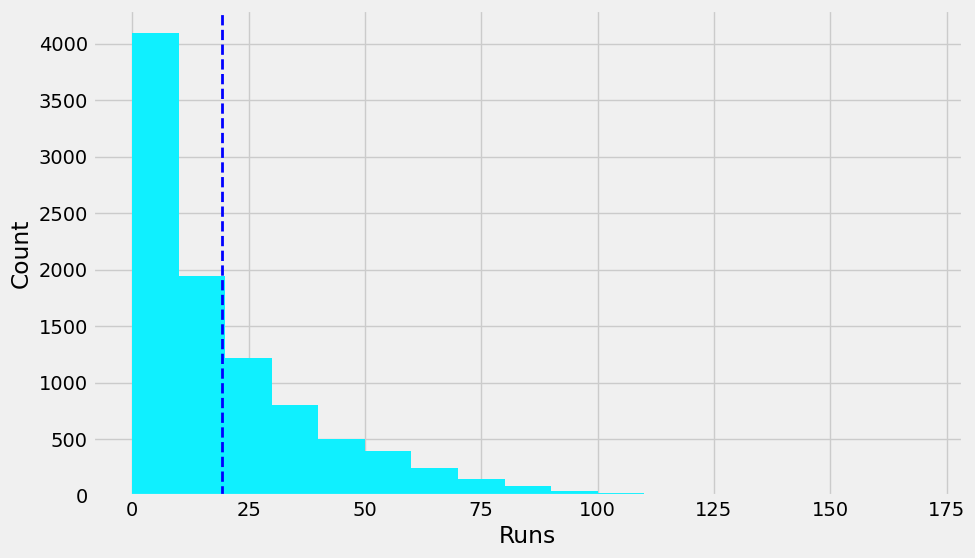

In [126]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

### Orange Caps Each Season(Highest Run Getter per Season) (INTERACTIVE)

In [127]:
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Top Bowlers

### Highest Wicket Taker

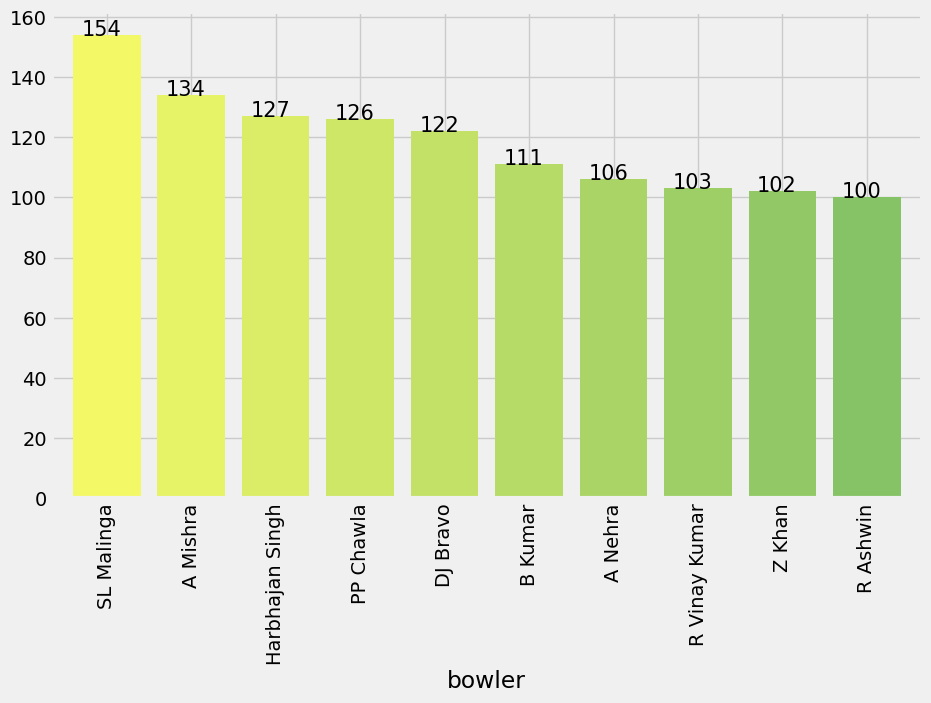

In [128]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

Lasith Malinga leads the chart, thanks to his unpredictable bowling action. Other bowlers have a very small wicket margin between them. 

### Maximum Overs

In [134]:
eco=delivery.groupby(['bowler']).sum(numeric_only=True)
eco['total balls']=delivery['bowler'].value_counts()
eco['total balls']=eco['total balls'].astype(int)
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()


,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432


Most Economical Bowlers with 300+ overs

In [135]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,SP Narine,R Ashwin,DW Steyn,SL Malinga,Harbhajan Singh,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.395706,6.493639,6.615599,6.757238,6.933735,7.046784,7.344444,7.404321,7.546174,7.612756


### Top 20 Bowlers (INTERACTIVE)

In [ ]:
bowlers=delivery.groupby('bowler').sum(numeric_only=True).reset_index()

bowl=delivery['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')

bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

KeyError: 'index'

In [ ]:

# Sum up numeric values for each bowler
bowlers = delivery.groupby('bowler').sum(numeric_only=True).reset_index()

# Get the number of balls bowled per bowler
bowl = delivery['bowler'].value_counts().reset_index()
bowl.columns = ['bowler', 'balls']  # Rename columns

# Merge the datasets
bowlers = bowlers.merge(bowl, on='bowler', how='left')

# Keep relevant columns and rename them
bowlers = bowlers[['bowler', 'total_runs', 'balls']]
bowlers.rename(columns={'total_runs': 'runs_given'}, inplace=True)

# Calculate overs bowled
bowlers['overs'] = (bowlers['balls'] // 6)

# Filter for wicket-taking dismissals
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct = delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]

# Count wickets per bowler
ct = ct['bowler'].value_counts().reset_index()
ct.columns = ['bowler', 'wickets']  # Rename columns

# Merge wickets data
bowlers = bowlers.merge(ct, on='bowler', how='left').fillna(0)  # Fill NaN with 0 for bowlers with no wickets

# Calculate economy rate
bowlers['economy'] = (bowlers['runs_given'] / bowlers['overs']).round(2)

# Display result
print(bowlers.head())


In [141]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 20 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

### Highest Dismissals for a Batsman by a Bowler

In [142]:
gayle=delivery[delivery['batsman']=='CH Gayle']
gayle=gayle[gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gayle=gayle.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gayle['batsman']='CH Gayle'

kohli=delivery[delivery['batsman']=='V Kohli']
kohli=kohli[kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
kohli=kohli.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
kohli['batsman']='V Kohli'


raina=delivery[delivery['batsman']=='SK Raina']
raina=raina[raina['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
raina=raina.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
raina['batsman']='SK Raina'

abd=delivery[delivery['batsman']=='AB de Villiers']
abd=abd[abd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
abd=abd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
abd['batsman']='AB de Villiers'

msd=delivery[delivery['batsman']=='MS Dhoni']
msd=msd[msd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
msd=msd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
msd['batsman']='MS Dhoni'


gg=delivery[delivery['batsman']=='G Gambhir']
gg=gg[gg['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gg=gg.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gg['batsman']='G Gambhir'

rohit=delivery[delivery['batsman']=='RG Sharma']
rohit=rohit[rohit['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
rohit=rohit.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
rohit['batsman']='RG Sharma'

uthapa=delivery[delivery['batsman']=='RV Uthappa']
uthapa=uthapa[uthapa['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
uthapa=uthapa.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
uthapa['batsman']='RV Uthappa'

dhawan=delivery[delivery['batsman']=='S Dhawan']
dhawan=dhawan[dhawan['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
dhawan=dhawan.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
dhawan['batsman']='S Dhawan'

warn=delivery[delivery['batsman']=='DA Warner']
warn=warn[warn['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
warn=warn.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
warn['batsman']='DA Warner'

new = gayle.append([kohli,raina,abd,msd,gg,rohit,uthapa,dhawan,warn])
new = new[['batsman','bowler','dismissal_kind']]
new.columns=['batsman','bowler','No_of_Dismissals']
new

AttributeError: 'DataFrame' object has no attribute 'append'

### Frequency Of Economy

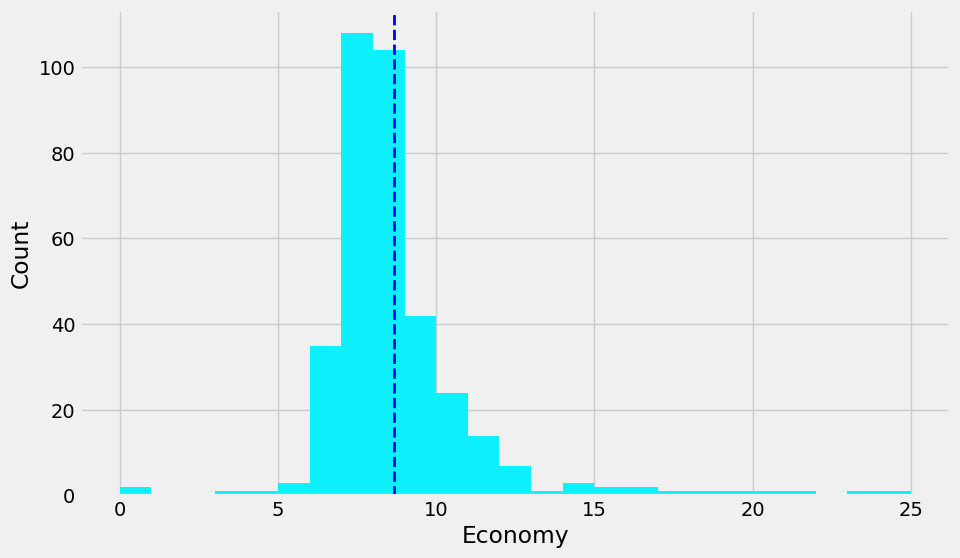

In [143]:
mlt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average economy rate is between 8.5-9

### Purple Caps Each Season (Maximum Wickets By Bowler per Season) (INTERACTIVE)

In [144]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(
    x=purple['season'].values,
    y=purple['count_wickets'].values,
    name='Total Matches',
    text=purple['bowler'].values,
    marker=dict(
        color='rgb(75,0,130)',
        line=dict(
            color='rgb(108,148,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Purple-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Extras And Wickets (INTERACTIVE)

In [145]:
extras=['wide_runs','bye_runs','legbye_runs','noball_runs']
sizes=[5161,680,3056,612]

dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=delivery[delivery["dismissal_kind"].isin(dismiss)]
bx=ct.dismissal_kind.value_counts()[:10]
bx


fig = {
  "data": [
    {
      "values": sizes,
      "labels": extras,
      "domain": {"x": [0, .48]},
      "name": "Extra's",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": bx.values ,
      "labels": bx.index,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Wickets",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Extras Distribution and Types Of Wickets",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "EXTRA'S",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "WICKETS",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'text' property of pie
        Received value: 'CO2'

    The 'text' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

## Teams with maximum Boundaries (INTERACTIVE)

In [146]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=delivery[delivery['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

KeyError: 'index'

RCB-RCB everywhere. Here too RCB leads with a big margin

## How to win Finals??

First let us see which teams have played and won the maximum finals

In [147]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()

KeyError: 'index'

Wooh!! CSK has played 6 IPL finals(but could win only 2 :( ) followed by RCB with 3. CSK,MI,KKR have all won 2 titles each. Sadly RCB have never won a final even with 3 apperances.

Looking at the graph we can say that next year too CSK has a high chance of featuring in the finals as it has featured in 6 out of their 8 seasons played. 

### Do Toss Winners Win Finals??

ValueError: Invalid RGBA argument: 'G'

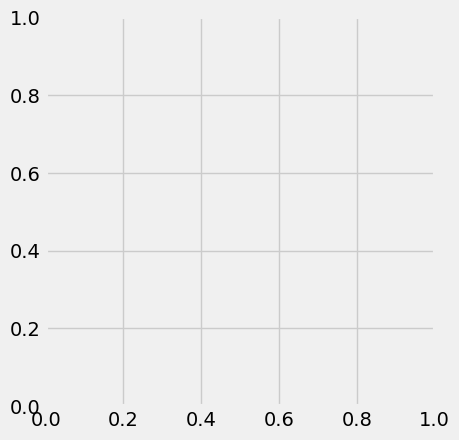

In [148]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

83.3%!!! chances is that the toss winning team wins the title. Thats a huge number and thus indication that winning the toss plays a great  role in match winning!! 

### Batting Or Fielding For Toss Winners

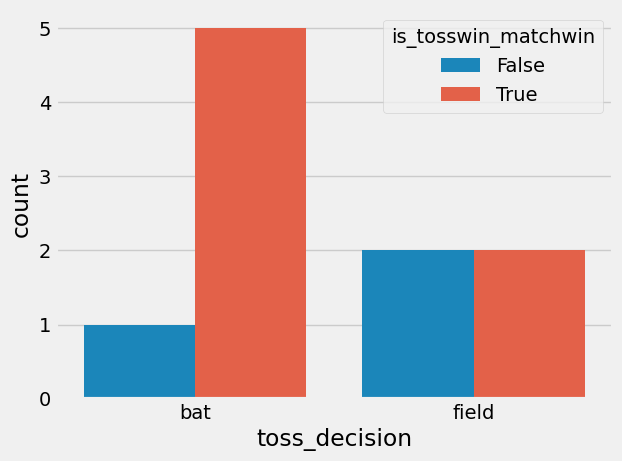

In [149]:
finals['is_tosswin_matchwin']=finals['toss_winner']==finals['winner']
sns.countplot(x='toss_decision',hue='is_tosswin_matchwin',data=finals)
mlt.show()

Looks like after **Winning The Toss** team should opt for **Batting** as we can see that batting has proved to be match winning decision for 4/5 times out of 9 finals.